# Week 5 Solutions

**If you are reading this without having tried the two problems from `Week5.ipynb`, then you should stop and try them out.**

Of course there are multiple ways to solve the following problems.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

Build a Python function that does the following:

**Input:** Given three `pandas` data frames `(df1, df2, df3)` each with 2 columns,

**Output:** A `matplotlib` plot of all three of scatter plots in a single plot (2 x 2 grid of subplots).

Check out a [matplotlib example](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html#stacking-subplots-in-two-directions) on subplots stacking in both horizontal and vertical direction.

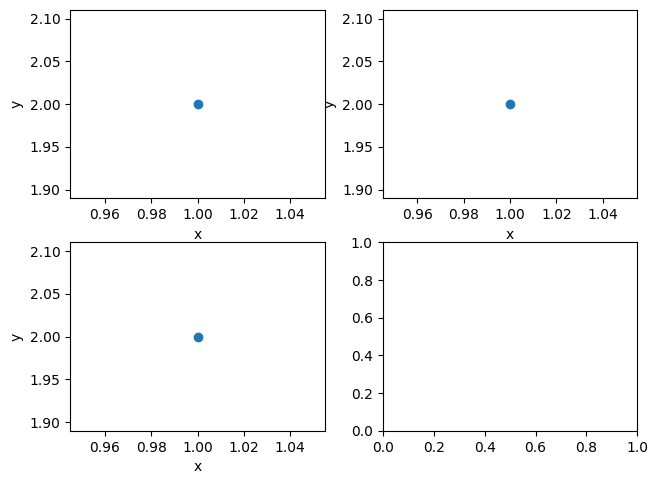

In [65]:
def grid_plot(df1, df2, df3):
    import matplotlib.pyplot as plt 

    DF = [df1, df2, df3]
    cvals = [df.columns.values for df in DF]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    k = 0
    for i in range(2): 
        for j in range(2 - i):
            axs[i,j].scatter(DF[k][cvals[k][0]], DF[k][cvals[k][1]])
            axs[i,j].set_xlabel(cvals[k][0])
            axs[i,j].set_ylabel(cvals[k][1])
            k += 1
    return fig 

df_test = pd.DataFrame({
    "x" : [1],
    "y" : [2]
})
fig = grid_plot(df_test, df_test, df_test)

## Problem 2

- Take the current data frame we have `df` and construct the three principal components. 
- Project the data onto every pair of principal components, so onto (PC1, PC2), (PC1, PC3) and (PC2, PC3).
- For each of the three different projections, build a `pandas` data frame with two columns.
- Input these three data frames into your function.

In [66]:
# Set up
df_big = pd.read_csv("data/global-data-on-sustainable-energy.csv")
df = pd.DataFrame({
    "f" : df_big["Electricity from fossil fuels (TWh)"], 
    "n" : df_big["Electricity from nuclear (TWh)"],
    "r" : df_big["Electricity from renewables (TWh)"]
})
df_clean = df.dropna()

Principal components
	PC1 : [0.959523   0.1306282  0.24950329],
	PC2 : [ 0.0749637   0.73550075 -0.673364  ],
	PC3 : [ 0.27147018 -0.66481194 -0.69593751].


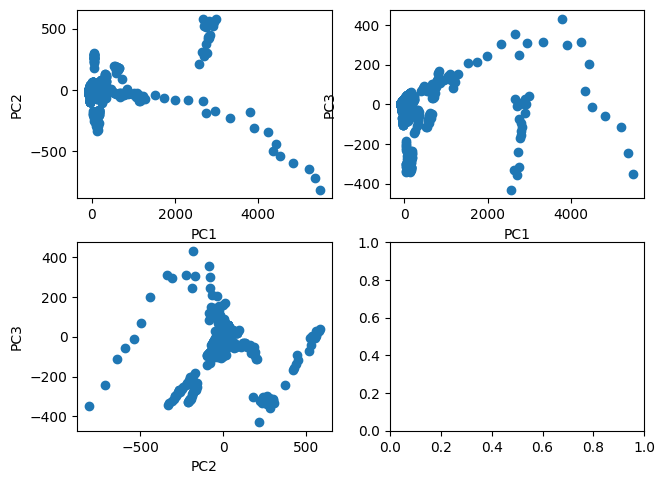

In [67]:
# Averages 
f_bar = sum(df_clean["f"]) / len(df_clean)
n_bar = sum(df_clean["n"]) / len(df_clean)
r_bar = sum(df_clean["r"]) / len(df_clean)

# Define our matrices
X = np.array([
    [x - f_bar for x in df_clean["f"]],
    [x - n_bar for x in df_clean["n"]],
    [x - r_bar for x in df_clean["r"]]
])
C_X = X @ X.T / len(df_clean)
# print(C_X) # We can see that the variances are all on different scales

# Perform linear algebra
E = np.linalg.eig(C_X)
Q = E.eigenvectors
# print((Q.T @ C_X @ Q).round()) # Sanity check!

# Rearrange Q to get eigenvalues decreasing
perm = np.array([
    [1, 0, 0],
    [0, 0, 1], 
    [0, 1, 0]
])
P = (-Q @ perm).T
# print((P @ C_X @ P.T).round()) # Sanity check!

print("Principal components\n\tPC1 : {0},\n\tPC2 : {1},\n\tPC3 : {2}.".format(P[0], P[1], P[2]))

# Build our new data frames
Y = P @ X
df1 = pd.DataFrame({
    "PC1" : Y[0],
    "PC2" : Y[1]
})
df2 = pd.DataFrame({
    "PC1" : Y[0],
    "PC3" : Y[2]
})
df3 = pd.DataFrame({
    "PC2" : Y[1],
    "PC3" : Y[2]
})

fig = grid_plot(df1, df2, df3)

## Problem 3

Repeat Problem 2 but rescale the data by incorporating the following function.

In [68]:
def mat_to_rescaled_mat(Z):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(Z)
    return scaler.transform(Z)

Principal components
	PC1 : [0.57735027 0.57735027 0.57735027],
	PC2 : [ 0.07099111  0.66893343 -0.73992454],
	PC3 : [ 0.81340453 -0.46818237 -0.34522216].


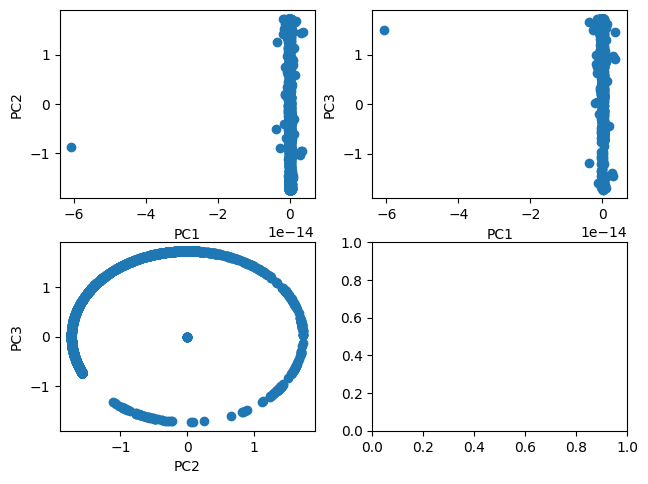

In [69]:
# Define our matrices
Z = np.array([
    df_clean["f"],
    df_clean["n"],
    df_clean["r"]
])
X = mat_to_rescaled_mat(Z)
C_X = X @ X.T / len(df_clean)
# print(C_X) # We can see that the variances are all on different scales

# Perform linear algebra
E = np.linalg.eig(C_X)
Q = E.eigenvectors
# print((Q.T @ C_X @ Q).round()) # Sanity check!

# Rearrange Q to get eigenvalues decreasing
perm = np.array([
    [1, 0, 0],
    [0, 0, 1], 
    [0, 1, 0]
])
P = (-Q @ perm).T
# print((P @ C_X @ P.T).round()) # Sanity check!

print("Principal components\n\tPC1 : {0},\n\tPC2 : {1},\n\tPC3 : {2}.".format(P[0], P[1], P[2]))

# Build our new data frames
Y = P @ X
df1 = pd.DataFrame({
    "PC1" : Y[0],
    "PC2" : Y[1]
})
df2 = pd.DataFrame({
    "PC1" : Y[0],
    "PC3" : Y[2]
})
df3 = pd.DataFrame({
    "PC2" : Y[1],
    "PC3" : Y[2]
})

fig = grid_plot(df1, df2, df3)